In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
print(os.listdir('./data'))

['opel_corsa_01.csv', 'opel_corsa_02.csv', 'peugeot_207_01.csv', 'peugeot_207_02.csv']


In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [7]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# opel_corsa_01.csv has 7392 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('./data/opel_corsa_01.csv', delimiter=';', nrows = nRowsRead)
df1.dataframeName = 'opel_corsa_01.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 18 columns


In [8]:
df1.head(5)

Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
0          59          -2.299988                  25.670519   
1          60          -2.099976                  24.094259   
2          61          -1.500000                  22.743179   
3          62           0.100037                  22.292820   
4          63           0.099976                  23.643900   

   VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
0            13.223501            121.592690              -2.476980   
1            13.638919            120.422571              -1.576260   
2            14.031043            118.456769              -1.351080   
3            14.171073            117.571308              -0.450359   
4            14.328954            117.074149               1.351080   

   LongitudinalAcceleration  EngineLoad  EngineCoolantTemperature  \
0                    0.3555    4.705883                        68   
1                    0.4492   10.588236                        68   
2                    0.4258   27.450981                        68   
3                    0.4140   24.313726                        69   
4                    0.3945   20.000000                        69   

   ManifoldAbsolutePressure  EngineRPM  MassAirFlow  IntakeAirTemperature  \
0                       106       1796        15.81                    24   
1                       103       1689        14.65                    22   
2                       103       1599        11.85                    21   
3                       104       1620        12.21                    20   
4                       104       1708        11.91                    21   

   VerticalAcceleration  FuelConsumptionAverage      roadSurface  \
0               -0.1133               19.497335  SmoothCondition   
1               -0.1289               19.515722  SmoothCondition   
2               -0.1328               19.441765  SmoothCondition   
3               -0.0859               19.388769  SmoothCondition   
4               -0.0664               19.301638  SmoothCondition   

                  traffic   drivingStyle  
0  LowCongestionCondition  EvenPaceStyle  
1  LowCongestionCondition  EvenPaceStyle  
2  LowCongestionCondition  EvenPaceStyle  
3  LowCongestionCondition  EvenPaceStyle  
4  LowCongestionCondition  EvenPaceStyle

C:\Users\andremcq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\andremcq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


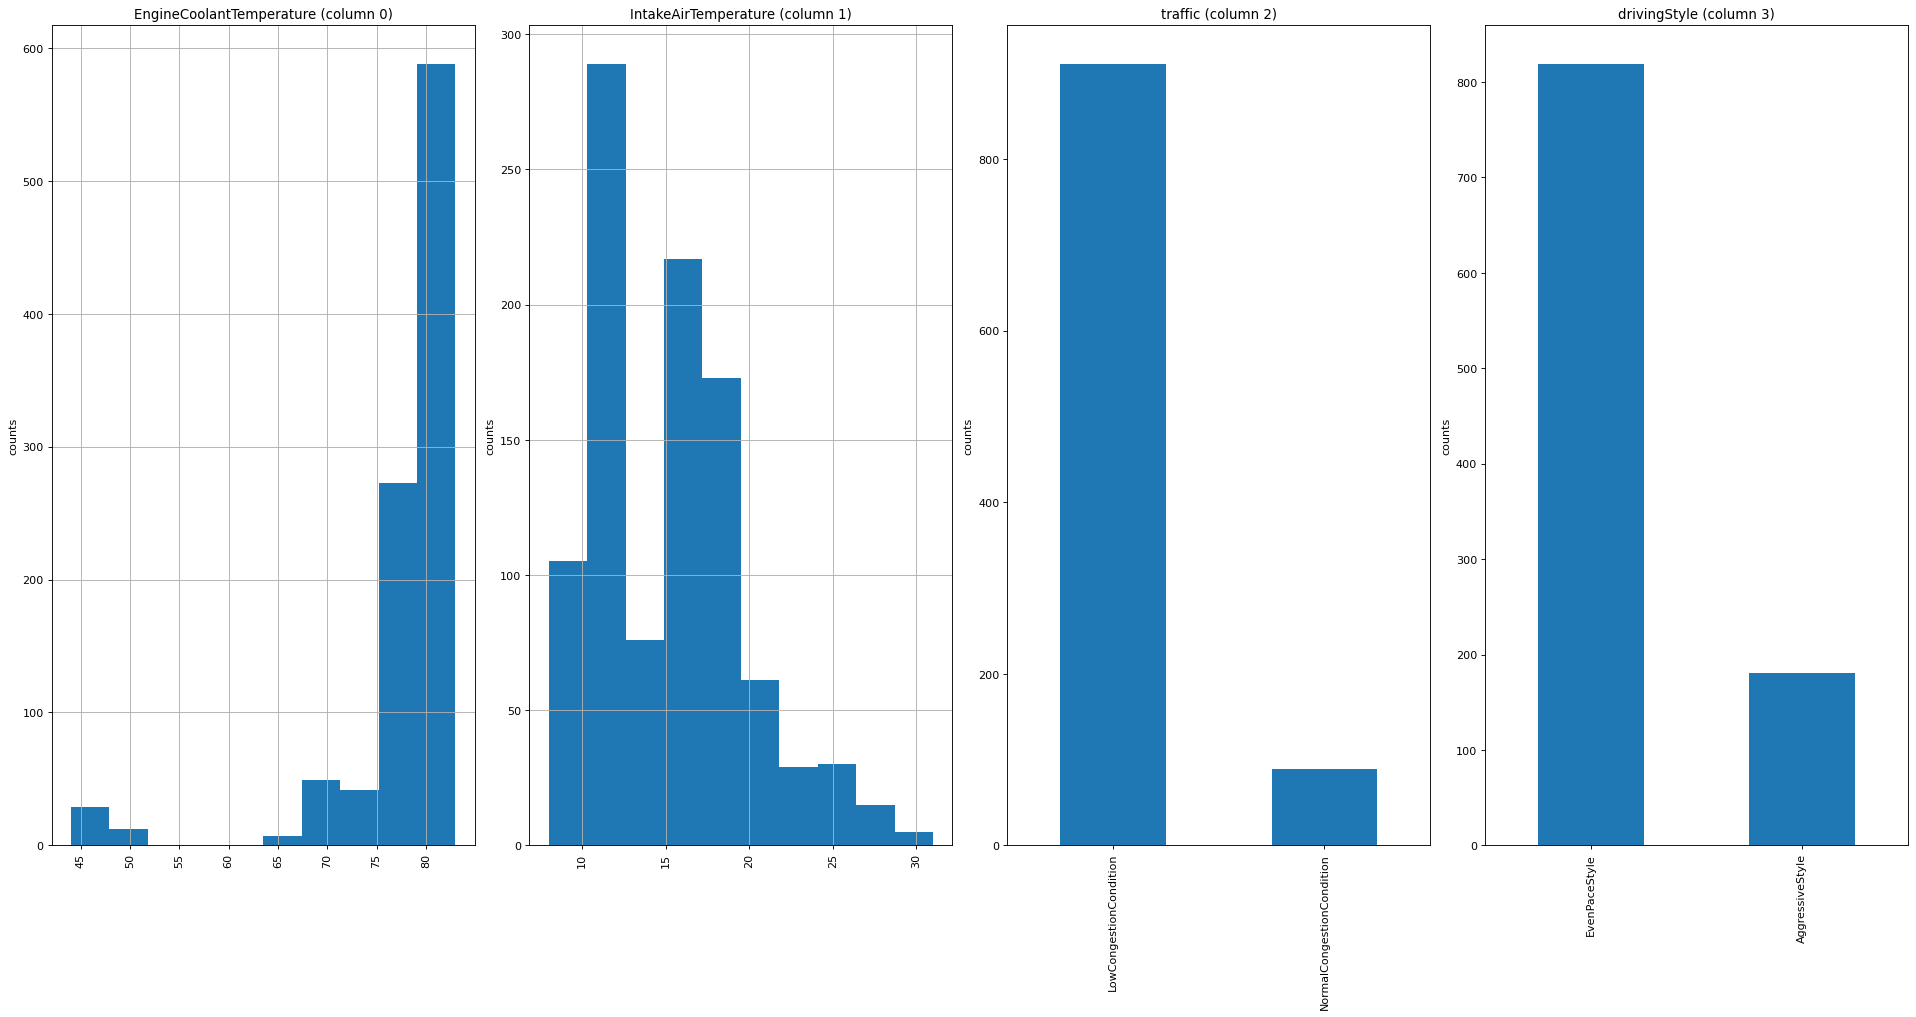

In [9]:
plotPerColumnDistribution(df1, 10, 5)

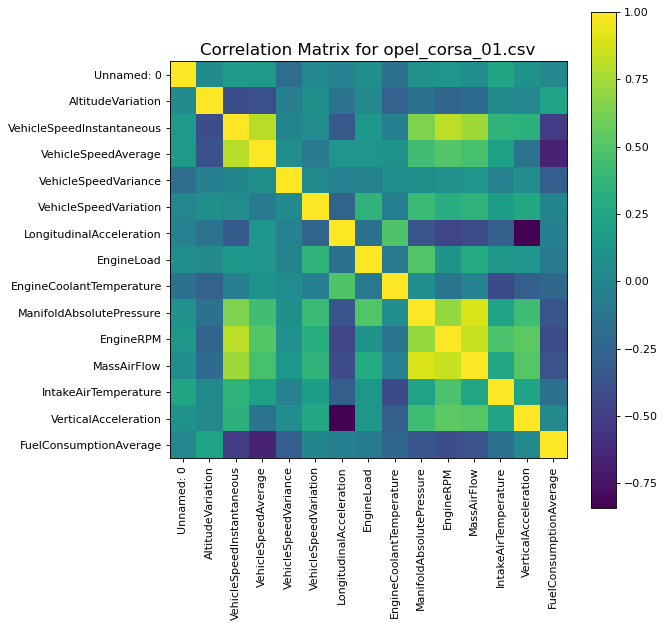

In [10]:
plotCorrelationMatrix(df1, 8)

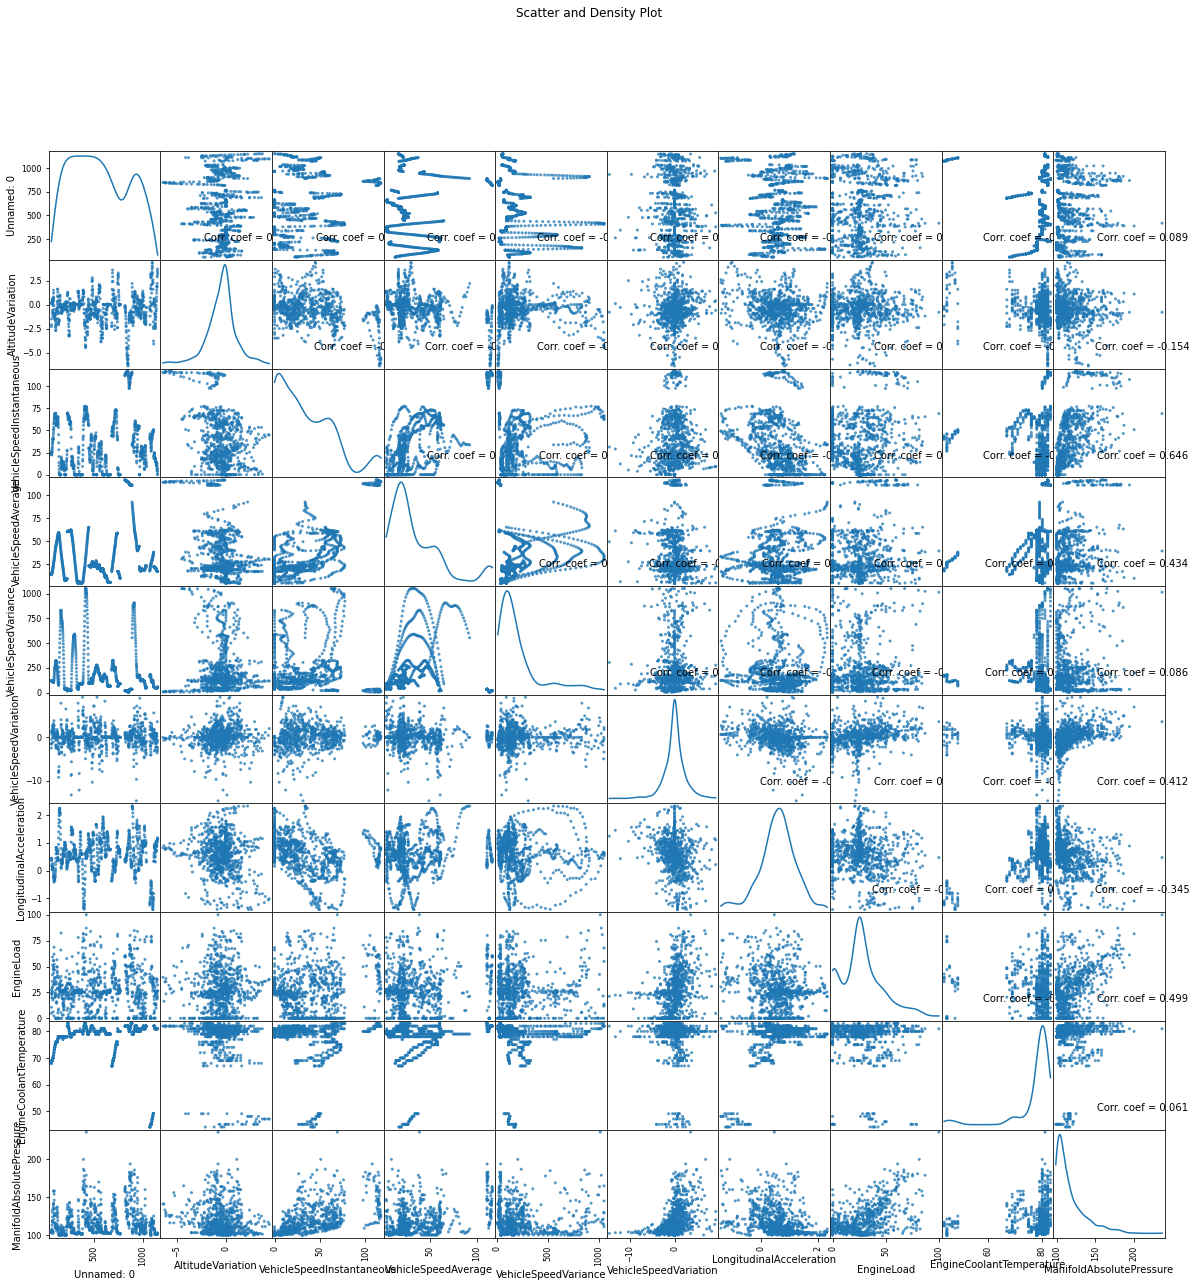

In [11]:
plotScatterMatrix(df1, 20, 10)

In [13]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# opel_corsa_02.csv has 4328 rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('./data/opel_corsa_02.csv', delimiter=';', nrows = nRowsRead)
df2.dataframeName = 'opel_corsa_02.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 18 columns


In [14]:
df2.head(5)

Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
0          44           0.599976                   3.828060   
1          45           0.600037                   5.629500   
2          46           0.700012                   8.106480   
3          47           0.699951                   9.232380   
4          48           0.500000                  11.709359   

   VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
0             8.147763             25.316045              -1.576261   
1             8.234082             24.411716               1.801440   
2             8.346672             23.596122               2.476980   
3             8.466768             22.917750               1.125900   
4             8.643159             22.150958               2.476979   

   LongitudinalAcceleration  EngineLoad  EngineCoolantTemperature  \
0                    7.1411   46.274509                        42   
1                    6.9776   56.470589                        42   
2                    7.1102   34.509804                        42   
3                    7.1609   27.843138                        42   
4                    7.2194    4.705883                        42   

   ManifoldAbsolutePressure  EngineRPM  MassAirFlow  IntakeAirTemperature  \
0                        99        899         6.20                    19   
1                       101       1066        10.96                    19   
2                       102       1629        10.93                    22   
3                       103       1629        12.85                    22   
4                       104       1849        14.82                    22   

   VerticalAcceleration  FuelConsumptionAverage      roadSurface  \
0               16.9427               35.635880  SmoothCondition   
1               17.0199               36.048752  SmoothCondition   
2               17.0740               36.117695  SmoothCondition   
3               17.0855               36.160938  SmoothCondition   
4               17.0393               36.187778  SmoothCondition   

                  traffic   drivingStyle  
0  LowCongestionCondition  EvenPaceStyle  
1  LowCongestionCondition  EvenPaceStyle  
2  LowCongestionCondition  EvenPaceStyle  
3  LowCongestionCondition  EvenPaceStyle  
4  LowCongestionCondition  EvenPaceStyle

C:\Users\andremcq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\andremcq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\andremcq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


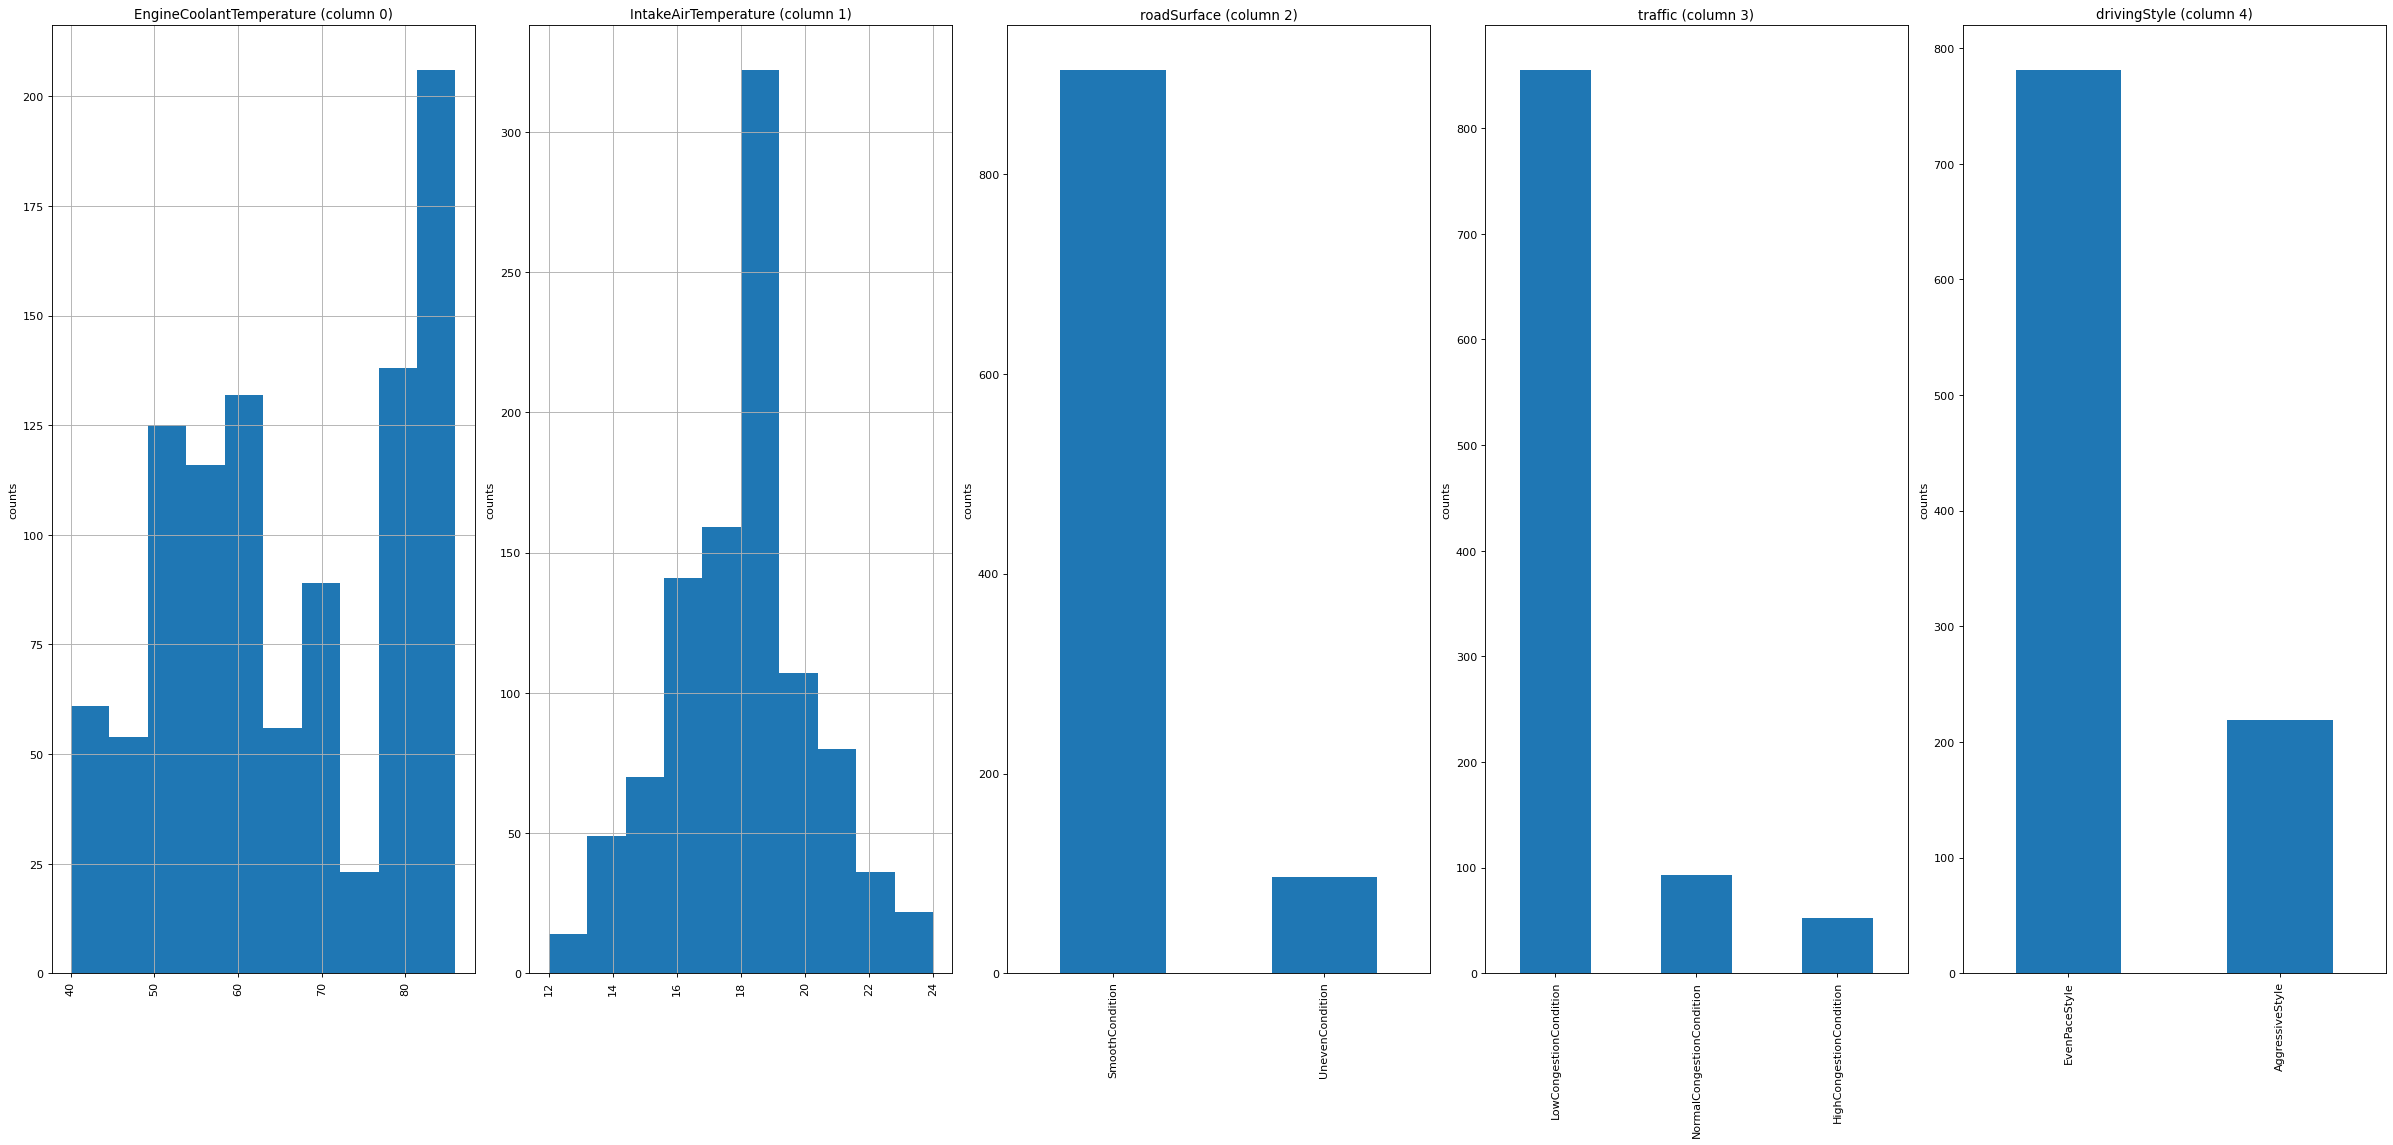

In [15]:
plotPerColumnDistribution(df2, 10, 5)

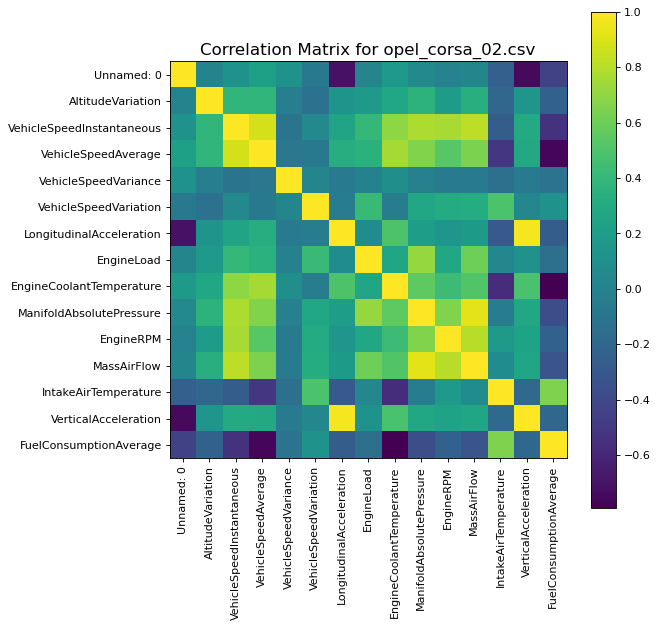

In [16]:
plotCorrelationMatrix(df2, 8)

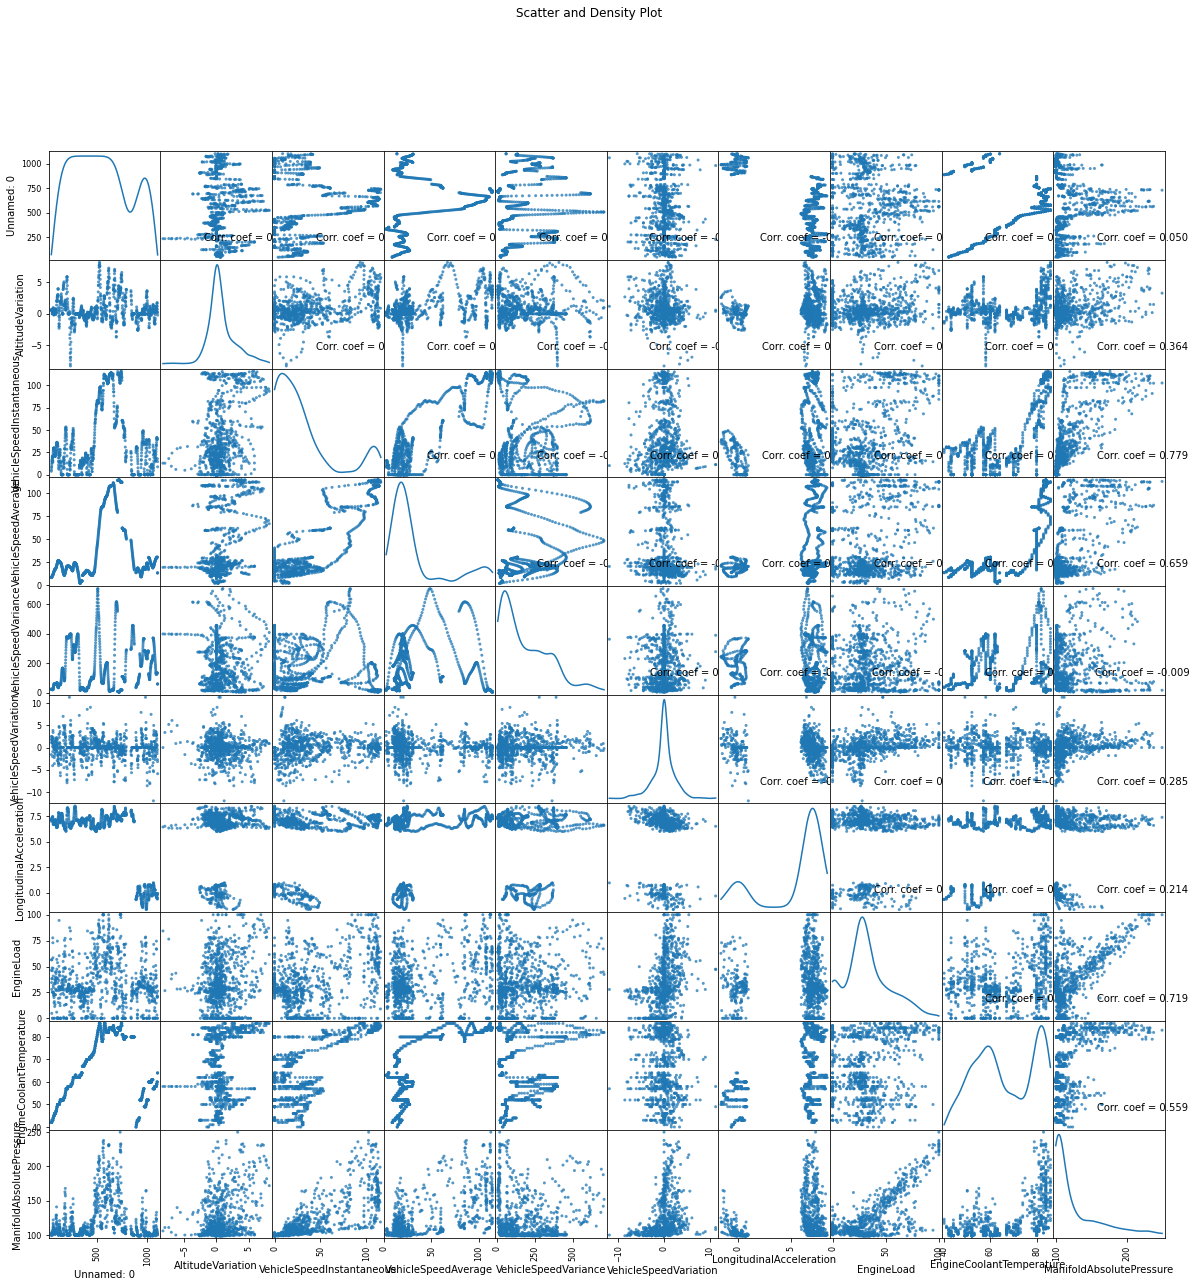

In [17]:
plotScatterMatrix(df2, 20, 10)

In [19]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# peugeot_207_01.csv has 8614 rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('./data/peugeot_207_01.csv', delimiter=';', nrows = nRowsRead)
df3.dataframeName = 'peugeot_207_01.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 18 columns


In [20]:
df3.head(5)

Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
0          59         -13.399994                  20.699999   
1          60         -13.200005                  17.100000   
2          61         -13.200005                  14.400000   
3          62         -11.800003                  14.400000   
4          63         -19.800003                  14.400000   

   VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
0                6.060            115.840061              -4.500000   
1                6.345            117.200816              -3.599998   
2                6.585            117.559595              -2.700001   
3                6.825            117.801222               0.000000   
4                7.065            117.925697               0.000000   

   LongitudinalAcceleration  EngineLoad  EngineCoolantTemperature  \
0                    1.0548   38.039215                      31.0   
1                    0.9012   38.039215                      31.0   
2                    0.9331   90.588234                      32.0   
3                    0.9878   90.588234                      32.0   
4                    1.1316   92.941177                      32.0   

   ManifoldAbsolutePressure  EngineRPM  MassAirFlow  IntakeAirTemperature  \
0                     101.0      798.0         6.22                  15.0   
1                     101.0      797.5         6.27                  15.0   
2                     101.0      797.5         6.27                  15.0   
3                     101.0      726.0         8.63                  15.0   
4                     101.0      784.0         8.88                  15.0   

   VerticalAcceleration  FuelConsumptionAverage      roadSurface  \
0               -0.5982               27.919697  SmoothCondition   
1               -0.5244               26.458355  SmoothCondition   
2               -0.5068               26.458355  SmoothCondition   
3               -0.4882               26.004126  SmoothCondition   
4               -0.6712               25.295498  SmoothCondition   

                  traffic   drivingStyle  
0  LowCongestionCondition  EvenPaceStyle  
1  LowCongestionCondition  EvenPaceStyle  
2  LowCongestionCondition  EvenPaceStyle  
3  LowCongestionCondition  EvenPaceStyle  
4  LowCongestionCondition  EvenPaceStyle

C:\Users\andremcq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\andremcq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\andremcq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


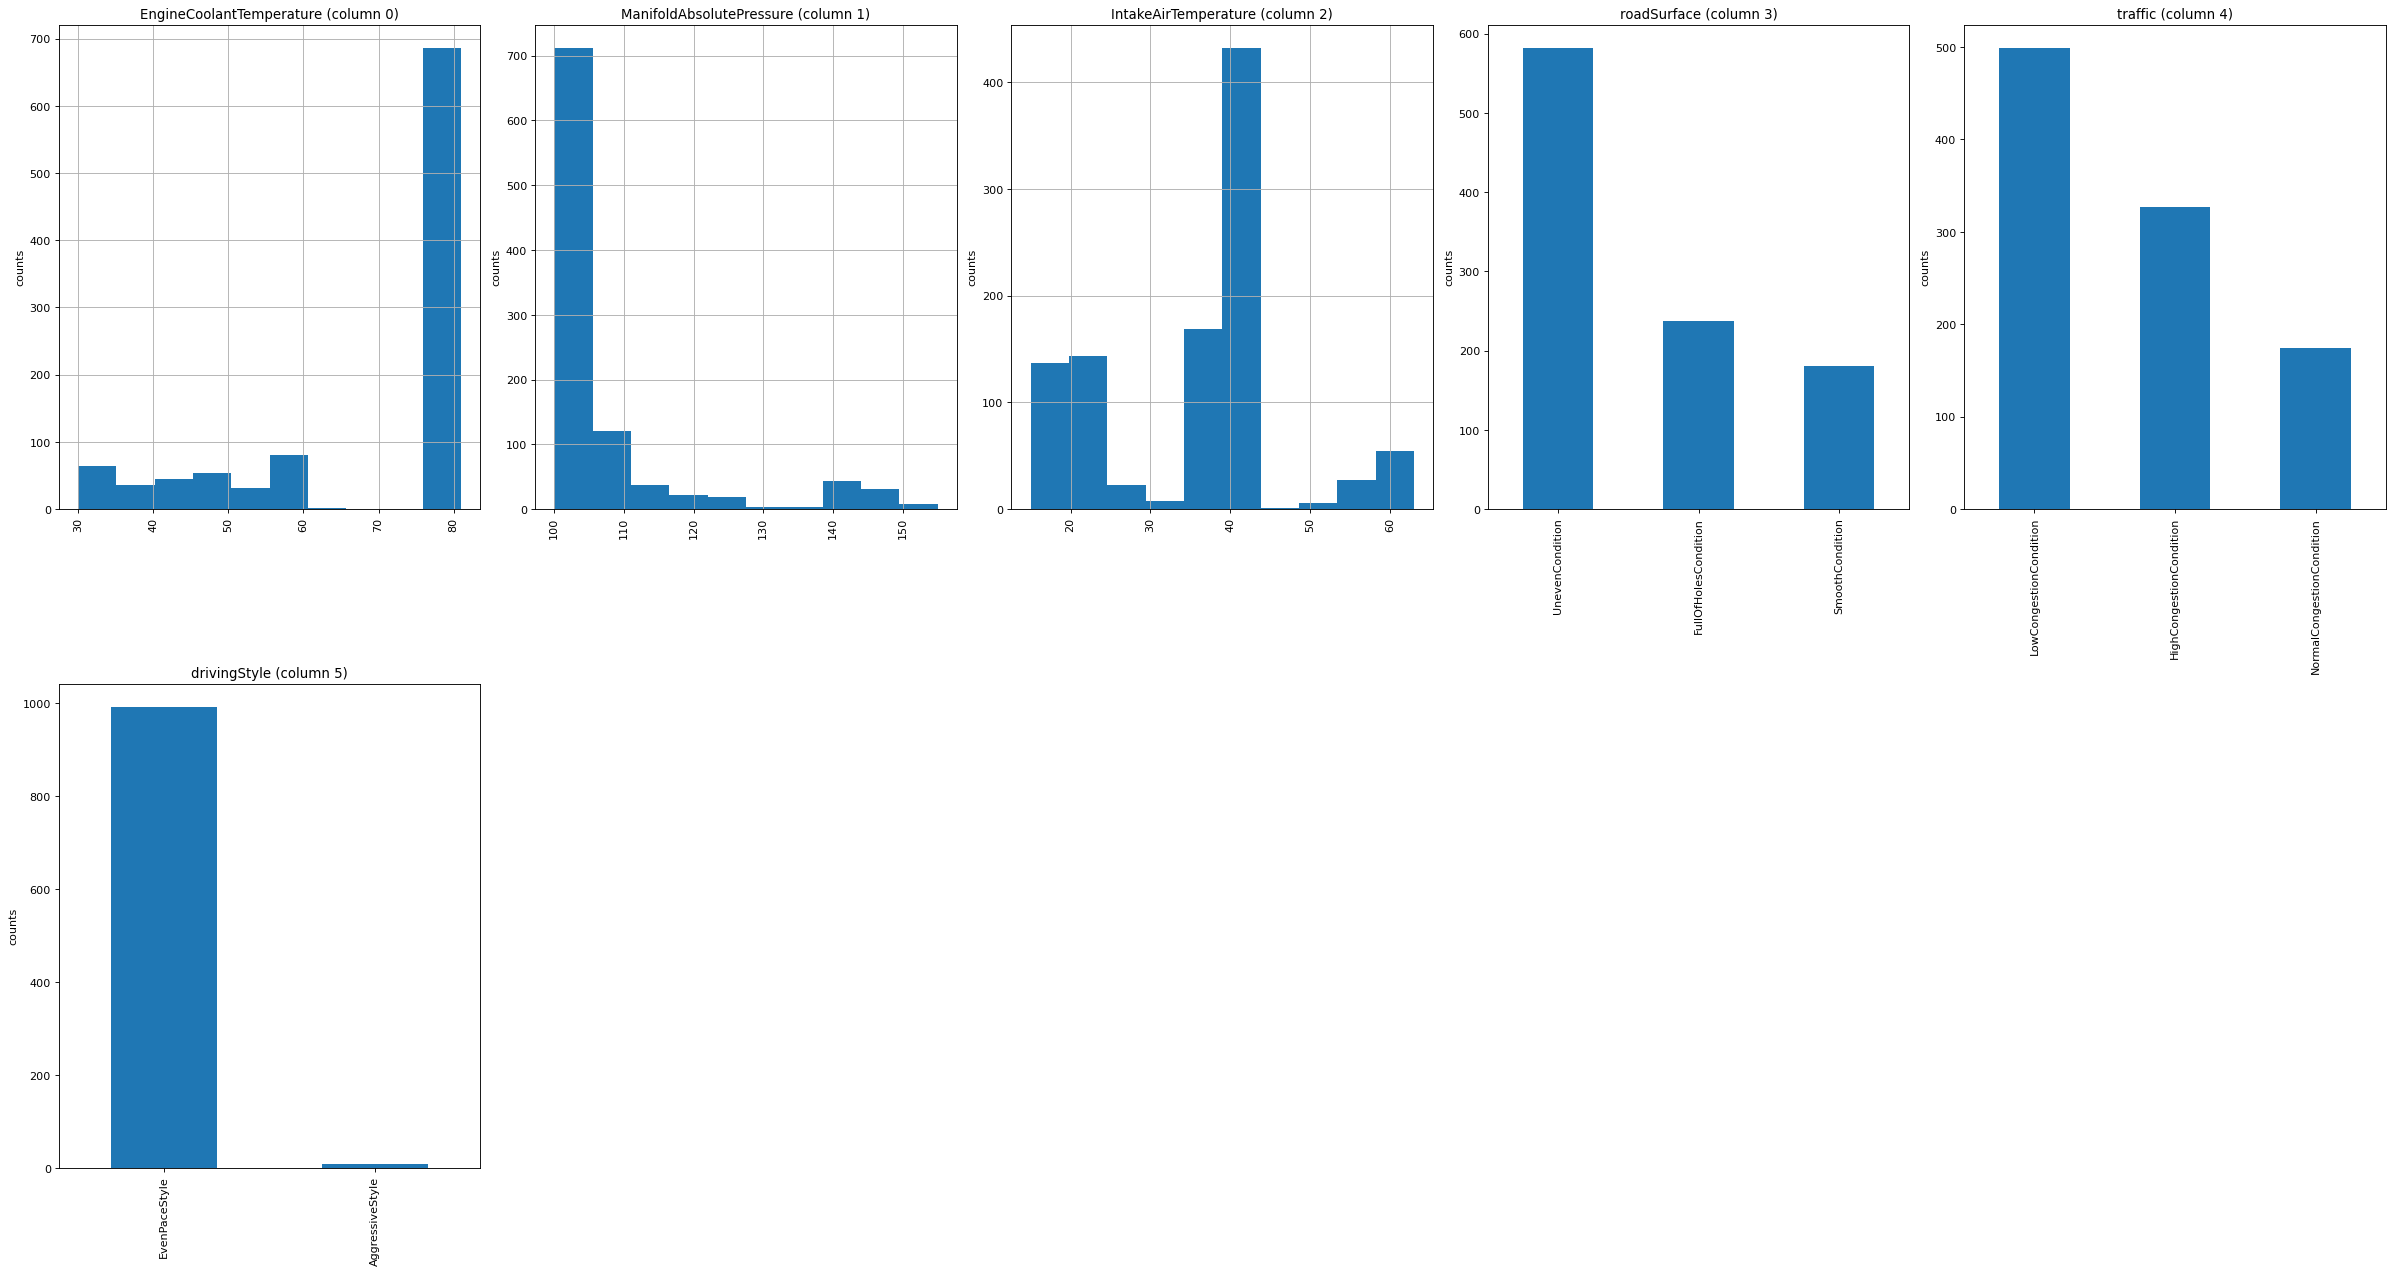

In [21]:
plotPerColumnDistribution(df3, 10, 5)

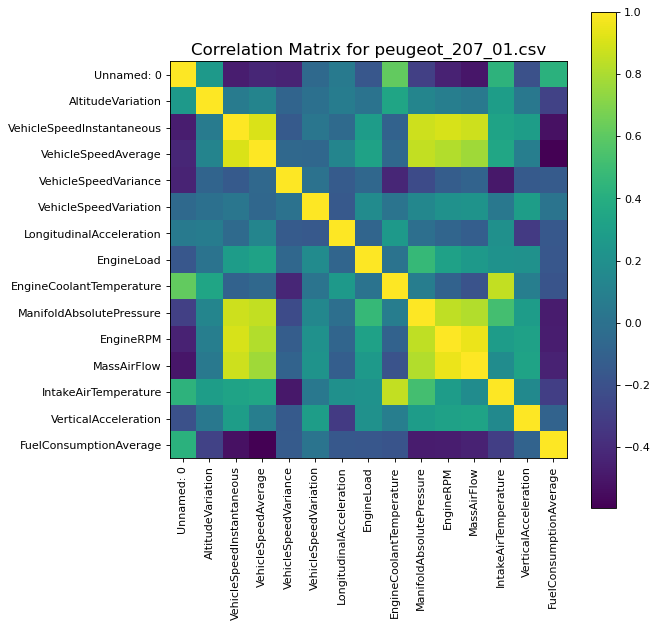

In [22]:
plotCorrelationMatrix(df3, 8)

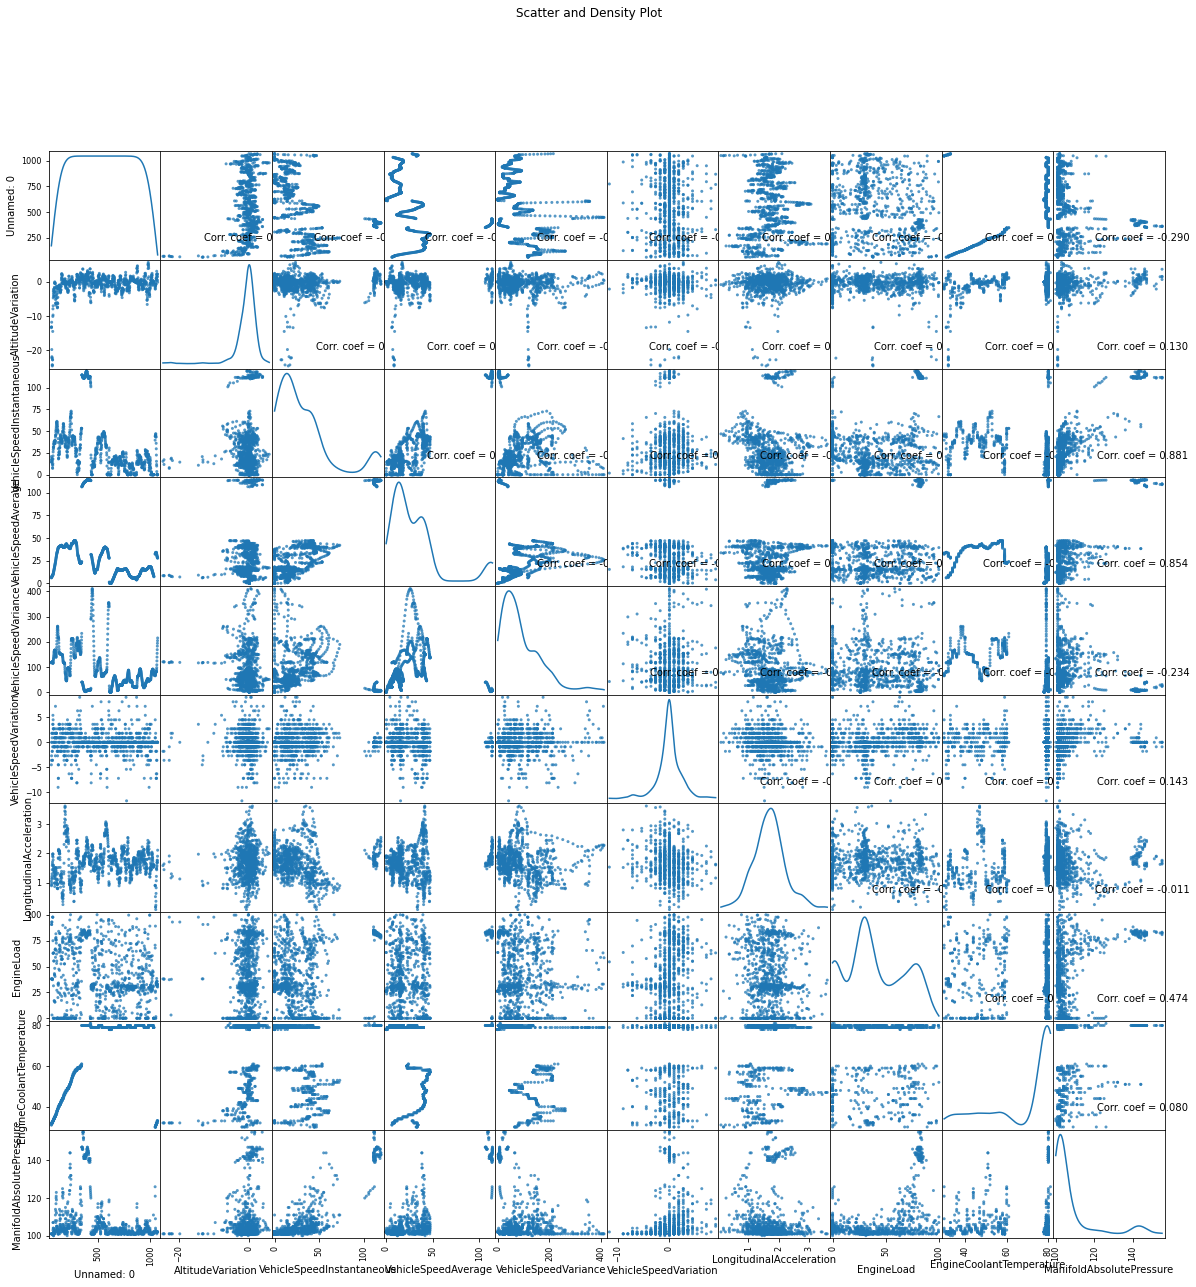

In [23]:
plotScatterMatrix(df3, 20, 10)

In [29]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# peugeot_207_02.csv has 8614 rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('./data/peugeot_207_02.csv', delimiter=';', nrows = nRowsRead)
df3.dataframeName = 'peugeot_207_02.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 18 columns


In [30]:
df3.head(5)

Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
0          59          -0.599998                  24.299999   
1          60           0.099998                  27.900000   
2          61          -0.200001                  30.599998   
3          62          -0.899998                  29.699999   
4          63          -0.900002                  28.799999   

   VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
0             8.720689             46.843772               6.299999   
1             9.045762             52.270798               3.600000   
2             9.405000             59.127937               2.699999   
3             9.900000             64.360674              -0.900000   
4            10.380000             68.519589              -0.900000   

   LongitudinalAcceleration  EngineLoad  EngineCoolantTemperature  \
0                   -1.2903   67.058823                        26   
1                   -1.4038    0.000000                        26   
2                   -1.3209   28.235294                        26   
3                   -1.4974    0.000000                        26   
4                   -1.3275   71.764709                        26   

   ManifoldAbsolutePressure  EngineRPM  MassAirFlow  IntakeAirTemperature  \
0                       115     1809.0    22.360001                    15   
1                       107      947.5    23.129999                    17   
2                       103      797.0    10.130000                    17   
3                       101     1112.0     6.050000                    15   
4                       102     1150.0    11.740000                    15   

   VerticalAcceleration  FuelConsumptionAverage      roadSurface  \
0                0.1468               28.784592  UnevenCondition   
1                0.2022               28.728073  UnevenCondition   
2                0.1834               27.799021  UnevenCondition   
3                0.2099               26.150261  UnevenCondition   
4                0.2898               25.721266  UnevenCondition   

                     traffic   drivingStyle  
0  NormalCongestionCondition  EvenPaceStyle  
1  NormalCongestionCondition  EvenPaceStyle  
2  NormalCongestionCondition  EvenPaceStyle  
3  NormalCongestionCondition  EvenPaceStyle  
4  NormalCongestionCondition  EvenPaceStyle

C:\Users\andremcq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\andremcq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\andremcq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


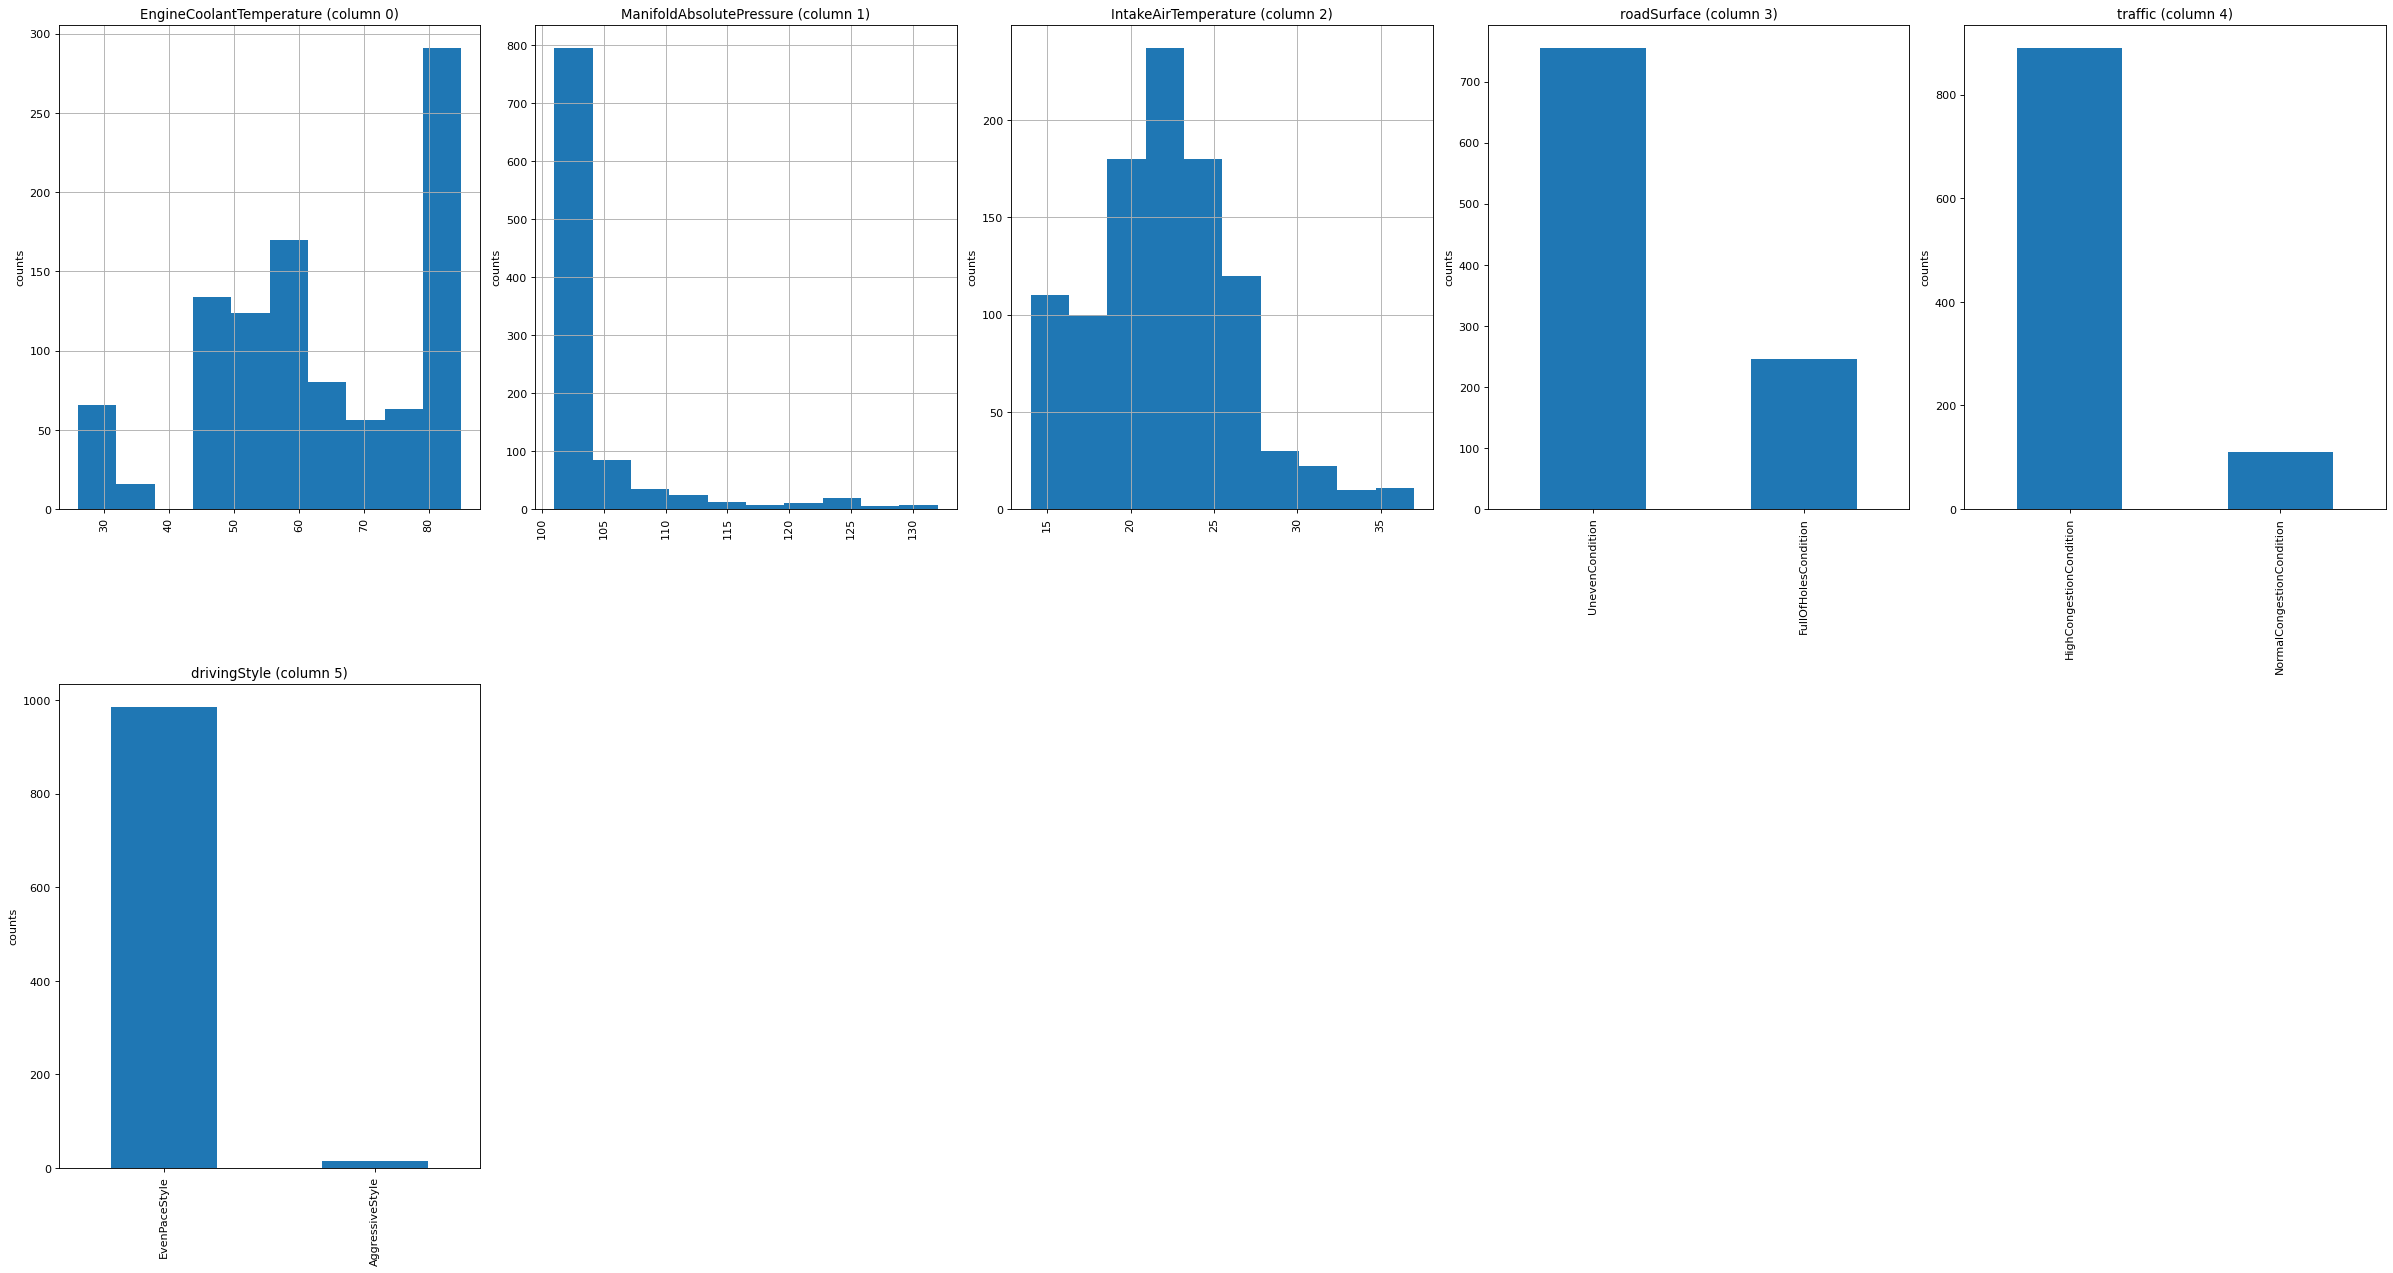

In [31]:
plotPerColumnDistribution(df3, 10, 5)

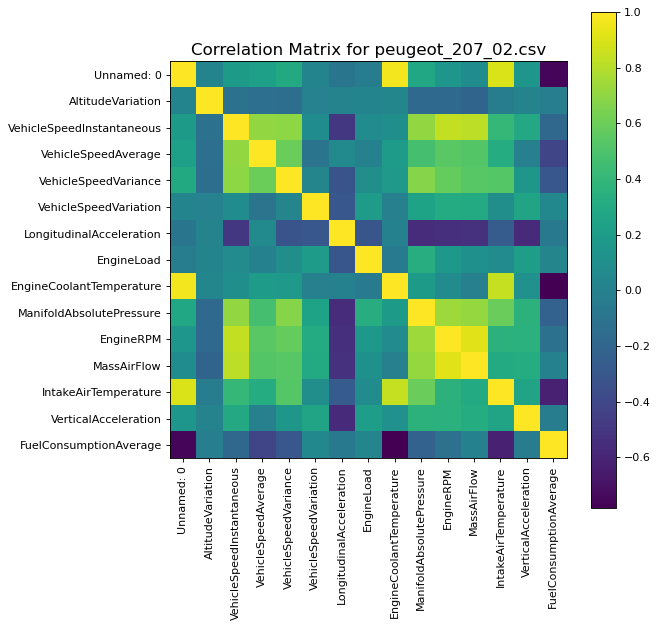

In [32]:
plotCorrelationMatrix(df3, 8)

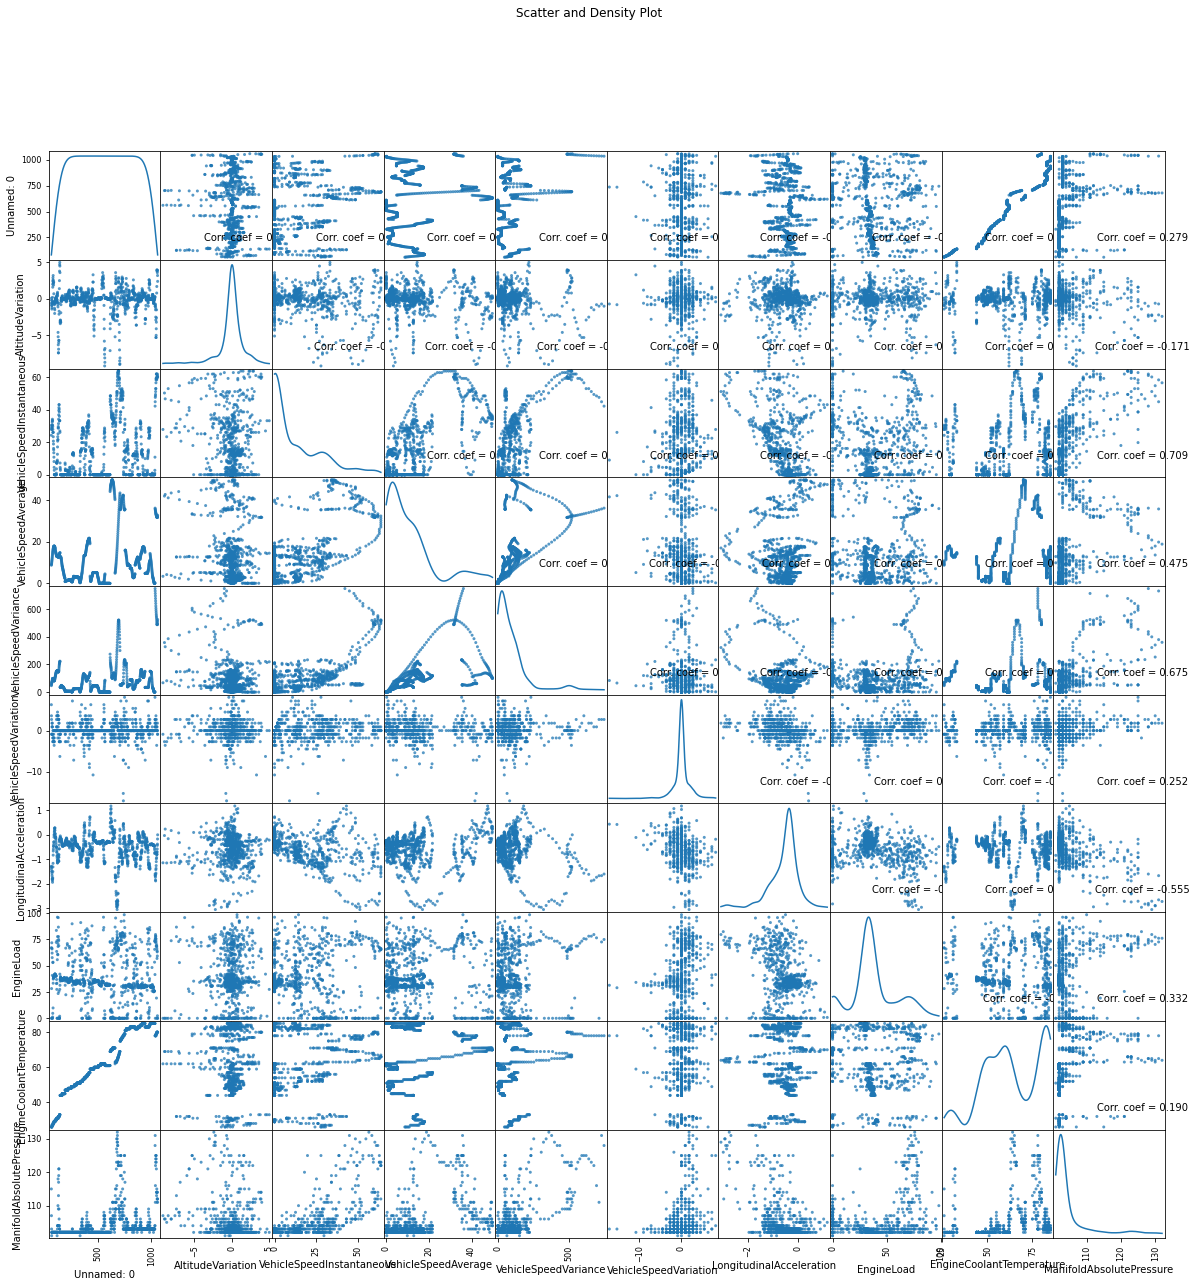

In [33]:
plotScatterMatrix(df3, 20, 10)